## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the raw data

In [3]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('car information.csv')
    
# Let's explore the top 5 rows of the df
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [ ]:
raw_data.head(5) # shows first 5 rows

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
# include = 'all' shows categorical values.
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- Drop Model variable as it has high cardinality (312 unique values), which may lead to overfitting. 
- Drop Registration variable it is highly imbalanced, with most observations registered as "yes" than few "no". 

### Determining the variables of interest

In [15]:
# Drop model columns
# axis=0 refers rows, while axis=1 refers columns 
data = raw_data.drop(['Model'],axis=1)
data = raw_data.drop(['Registration'], axis=1)
# Check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


### Dealing with missing values

In [ ]:
# True (1) = the data point is missing, while False (0) = the data point is not missing
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
Model            0
dtype: int64

 - Price and EngineV only contains missing values 

In [ ]:
# Rule of tumb: if removing less than 5% of observations, it's safe to remove all missing values
data_no_mv = data.dropna(axis=0) #drops all rows that contains "missing" values 

In [26]:
# Check the descriptives without the missing values
data_no_mv.describe(include='all') 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


- $6,999 (Q1 - 25%) 
- $11,500 (Q2 - 50%) 
- $21,900 (Q3 - 75%) 
- $300,000 (max - 100%)

- While 75% of vehicles cost less than $21,900, a small number of high-end cars (75% - 100%) increase the maximum price to $300,000.
- Therefore, this indicate that the distribution of car prices are strongly **right-skewed.**

### Exploring the PDFs

- It is time to investigate out how or why those 75% - 100% increase those max price to $300k.

In [25]:
# See which features are highly correlated with Price 
corr = data_no_mv.corr(numeric_only=True)

price_corr = corr["Price"].sort_values(ascending=False)
print(price_corr)

Price      1.000000
Year       0.485734
EngineV    0.058664
Mileage   -0.473523
Name: Price, dtype: float64


- The least correlated with price is Mileage. 
    - As Mileage decreases, Price tends to increase. 
- The most correlated with price is Year.
    - As Year increase, price tends to increase. 


<Axes: xlabel='Price', ylabel='Density'>

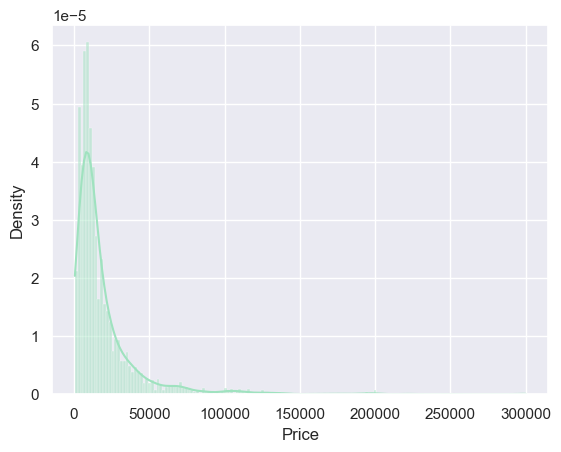

In [ ]:
# Display the Probability Distribution Function (PDF) of a variable to spot anomalies, such as outliers
# The PDF will show us how that variable is distributed 
sns.set_palette(["#9FE2BF"]) #seafoam color
sns.histplot(data_no_mv['Price'], kde=True, stat="density", color="#9FE2BF")

- Outliers = observations that lie on abnormal distance from other observations in data.
- One way to remove outliers is to remove top 1% of observations data.
- outliers are situated around the higher prices (right side of the graph)

### Dealing with outliers

In [20]:
# Declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99) #we include 99th percentile, excluding top 1% percentile

# Create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]

# Check that it removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,2011.000000,NaN


- Max price has gone down by $778.

<Axes: xlabel='Price', ylabel='Density'>

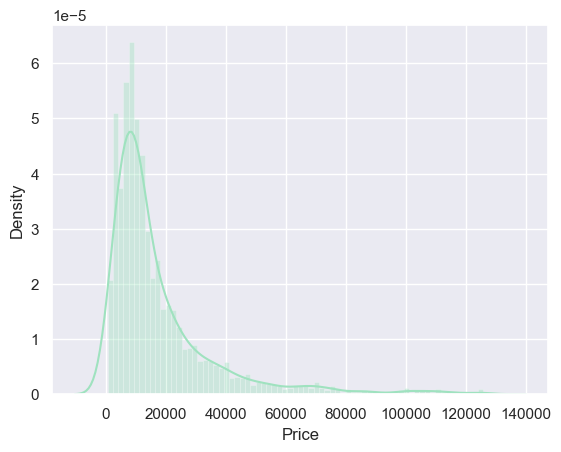

In [22]:
# check the PDF once again to ensure that the result is still distributed in the same way overall
sns.histplot(data_1['Price'], kde=True, stat="density",
             kde_kws=dict(cut=3), alpha=.4, 
             edgecolor=(1, 1, 1, .4), color="#9FE2BF",
            )

- Graph shows right-skewed.

<Axes: xlabel='Mileage', ylabel='Density'>

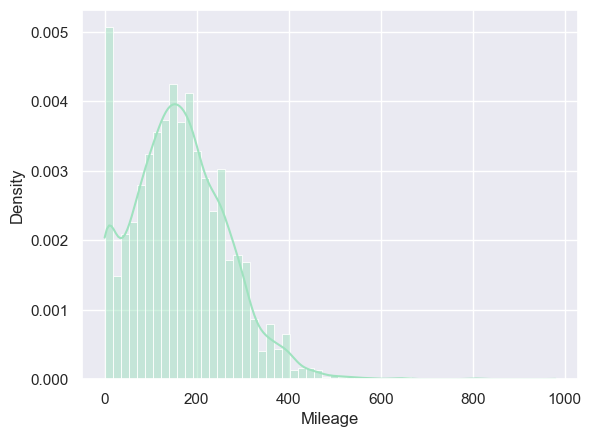

In [ ]:
# Check mileage
sns.histplot(data_no_mv['Mileage'], kde = True, stat= "density", color = "#9FE2BF")

- Graph shows right-skewed.

<Axes: xlabel='Mileage', ylabel='Density'>

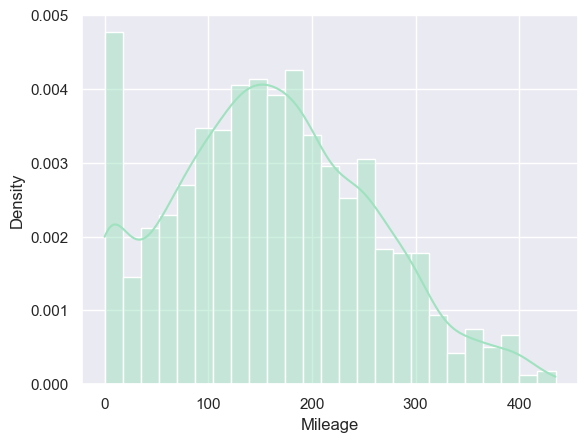

In [28]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.histplot(data_2['Mileage'], kde=True, stat="density",color="#9FE2BF")

- There are alot of missing values encoded as 0. 

In [31]:
data_no_mv['Mileage'].value_counts().head(10)

Mileage
0      147
1      111
200     85
250     74
300     70
180     61
160     57
220     46
230     45
150     44
Name: count, dtype: int64

In [43]:
pd.DataFrame(data_no_mv['Mileage']).sort_values(by='Mileage')

,Mileage
4327,0
20,0
5,0
2550,0
2622,0
...,...
3222,650
3457,650
3091,800
3625,810


- Since data seems normal, we proceed with EngineV.

<Axes: xlabel='EngineV', ylabel='Density'>

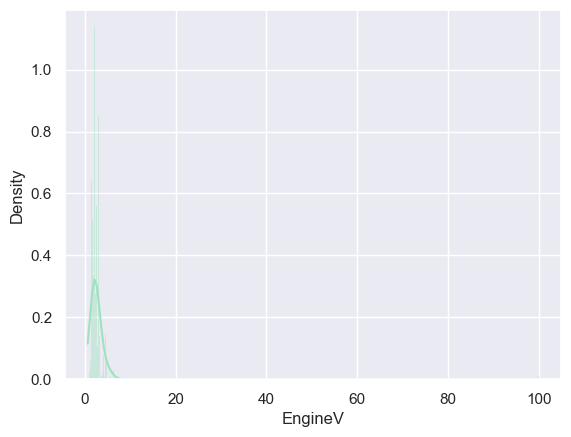

In [36]:
sns.histplot(data_no_mv['EngineV'], kde=True, stat="density",color="#9FE2BF")

<Axes: xlabel='EngineV', ylabel='Density'>

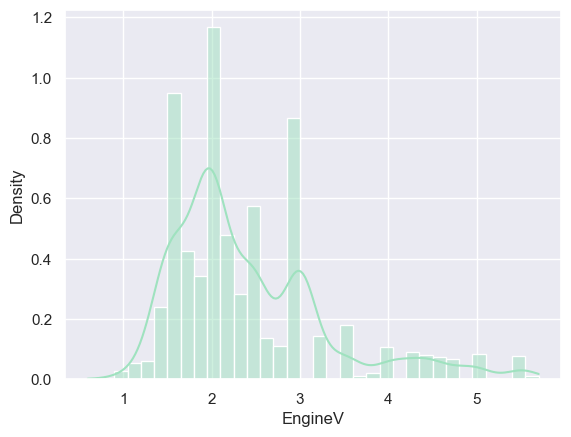

In [35]:
q = data_1['EngineV'].quantile(0.99)
data_3 = data_1[data_1['EngineV']<q]
sns.histplot(data_3['EngineV'], kde=True, stat="density",color="#9FE2BF")

- At first graph of EngineV, distribution was heavy right-skewed. 
- After remvoing 99% percentile, it became normal. 
    - This could mean that are there are missing values classified as fixed high values. 

In [44]:
data_no_mv['EngineV'].value_counts().head(10)

EngineV
2.0    689
3.0    491
2.5    339
1.6    312
2.2    277
1.5    248
1.8    242
1.9    202
1.4    138
2.4    133
Name: count, dtype: int64

In [41]:
pd.DataFrame(data_no_mv['EngineV']).sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
2432,1.00
3627,1.00
1923,1.00
...,...
256,99.99
3641,99.99
930,99.99
3114,99.99


-  These missing values are indicated as "99.99", which could be one of the factor issue for the absurb max price of $300k. 

Since 99.99L is too unrealistic, I did a quick google search and these are my findings: 

- Standard Cars: 1.5L to 2.5L (e.g., 1500cc to 2500cc).

- Performance Cars: 3.0L and above.

    - So since max engine volume is about 3.0L+, we set about 6.7L as the max baseline to elimate outliers. 

<Axes: xlabel='EngineV', ylabel='Density'>

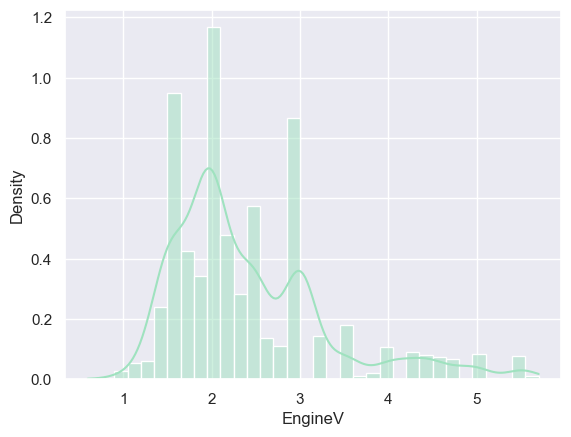

In [48]:
# The natural domain of this variable Car engine volumes are usually between 0.6 to 6.5l (google search)
data_4 = data_3[data_3['EngineV']<6.7]
sns.histplot(data_3['EngineV'], kde=True, stat="density",color="#9FE2BF")

<Axes: xlabel='Year', ylabel='Density'>

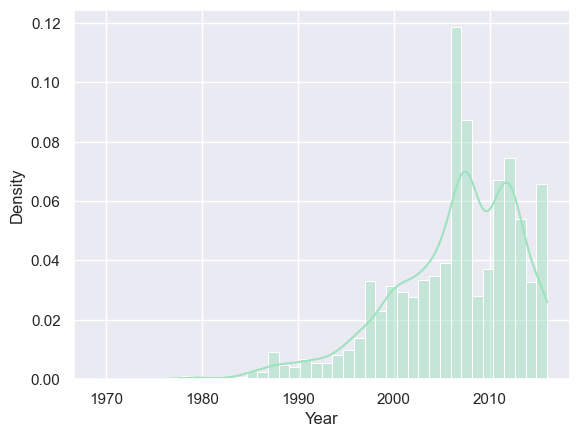

In [50]:
# Outliers are on the low end
sns.histplot(data_no_mv['Year'], kde=True, stat="density",color="#9FE2BF")

- Now it is no longer right-skewed. However, it is heavy left-skewed. 

In [51]:
# Remove 1% bottom percentile
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

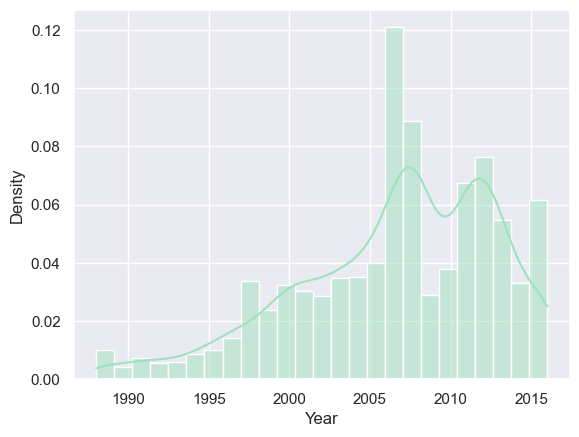

In [52]:
sns.histplot(data_4['Year'], kde=True, stat="density",color="#9FE2BF")

In [53]:
#So we need to reset the indexes so as to go as: 0,1,2,3,4,5 because we initally remove 2 columns from our dataset which became as 0,1,4,5,6. 

# 'drop=True' to completely delete the newly self-created column after we reset the index.
data_cleaned = data_4.reset_index(drop=True)

In [55]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3878,3878.000000,3878,3878.000000,3878.000000,3878,3878.000000,3878
unique,7,NaN,6,NaN,NaN,4,NaN,290
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,861,NaN,1466,NaN,NaN,1834,NaN,183
mean,NaN,17935.781359,NaN,164.446622,2.423917,NaN,2006.612945,NaN
std,NaN,18934.196915,NaN,102.512963,0.898637,NaN,6.187468,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,93.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21150.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


- Max price is still at near 130k. 

## Check the Ordinary Least Square (OLS) assumptions

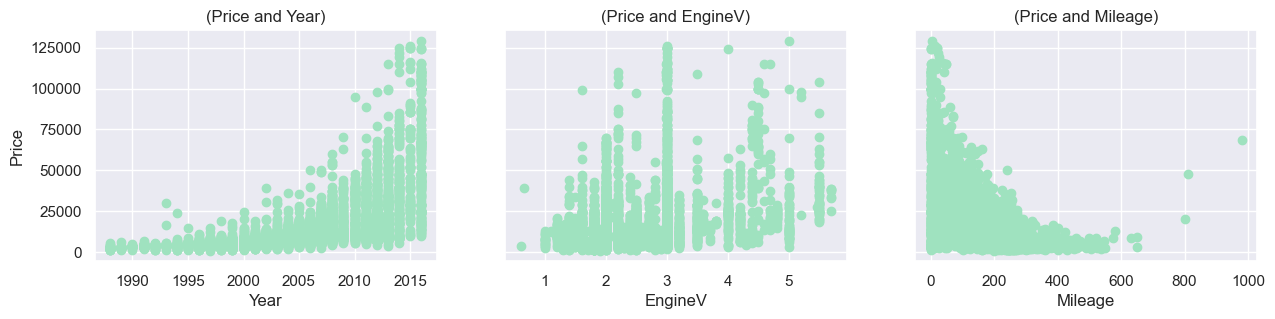

In [ ]:
# Plot 3 scatter plot graphs
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' on 3 graph as y-axis

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('(Price and Year)')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('(Price and EngineV)')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('(Price and Mileage)')

ax1.set_ylabel('Price')
ax1.set_xlabel('Year')
ax2.set_xlabel('EngineV')
ax3.set_xlabel('Mileage')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

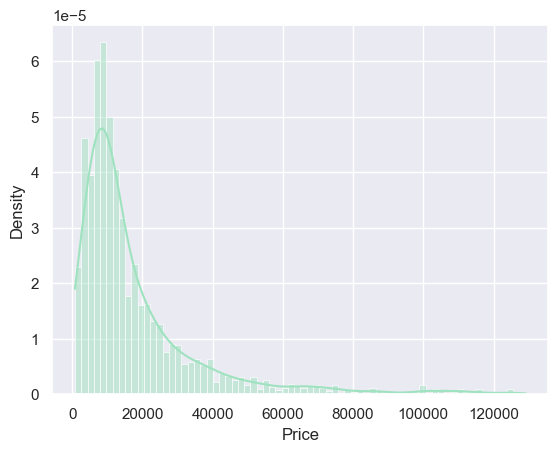

In [57]:
sns.histplot(data_cleaned['Price'], kde=True, stat="density",color="#9FE2BF")

- From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed / skewed distribution
- A good transformation in that case is a log transformation. (etc. ln(4200) = 8.342840)

### Relaxing the assumptions

In [58]:
# Let's transform 'Price' with a log transformation because it is right-skewed distribution
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3873,Volkswagen,11500.0,van,163,2.5,Diesel,2008,T5 (Transporter),9.350102
3874,Toyota,17900.0,sedan,35,1.6,Petrol,2014,Corolla,9.792556
3875,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014,S 350,11.736069
3876,BMW,6500.0,sedan,1,3.5,Petrol,1999,535,8.779557


<Axes: xlabel='log_price', ylabel='Density'>

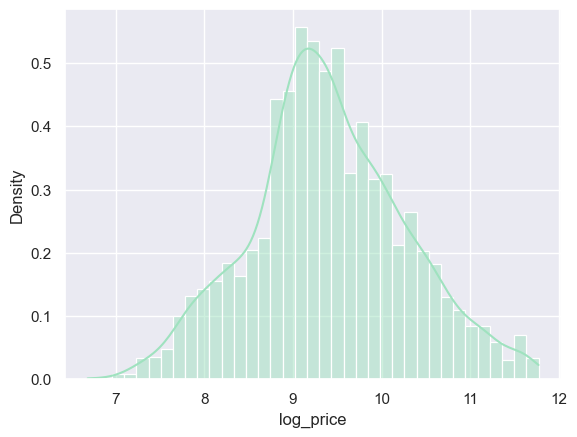

In [59]:
sns.histplot(data_cleaned['log_price'], kde=True, stat="density",color="#9FE2BF")

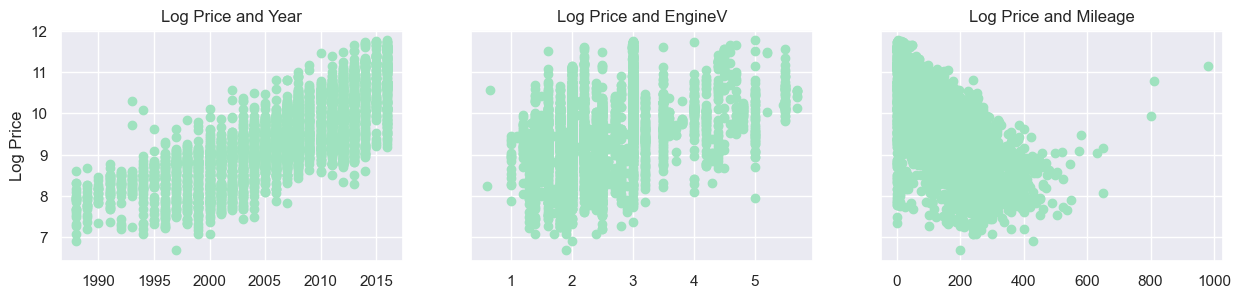

In [60]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
ax1.set_ylabel('Log Price')

plt.show()

# The relationships show a clear and good linear relationship
# Alternatively we could have transformed each of the independent variables

In [63]:
data_cleaned.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4,9.814656


In [64]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity
- In order to make our model predict better, we need to remove those highly correlated features.
    - These highly correlated features will make it hard for the model to figure out each feature’s effect, which can make coefficient estimates unstable.

    
- It happens when two or more predictor variables in a regression model are highly correlated.
    - Variance Inflation Factor (VIF) measures how much a feature is correlated with other features, by measuring how much the variance (or standard error) of a feature’s coefficient is inflated due to correlation with other features. 
        - VIF = 1: no Multicollinearity (No correlation with other features)
        - VIF = 1 - 5: Semi-Multicollinearity (Moderate correlation, usually OK)
        - VIF > 5: High Multicollinearity (High correlation → consider removing the feature)

In [65]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'Model', 'log_price'], dtype=object)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Declare a variable where we put all features to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

# variance_inflation_factor output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.551632,Mileage
1,10.613414,Year
2,8.278981,EngineV


In [67]:
# Since Year has the highest VIF, it will be removed from the model, which drives other variables' VIF down.
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Encoding categorical variables
- Linear models require numerical input, so dummies convert categorical variables into numbers while retaining information about each level.

In [70]:
# To include the categorical data in the regression, let's create dummies
# 'pd.get_dummies()' spots all categorical variables and creates dummies automatically
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [71]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,8.974618,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,9.495519,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,10.043249,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,9.814656,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Rearrange

In [98]:
# To make our data frame more organized, place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [99]:
# Declare a new variable that will contain the preferred order
# Most intuitive order: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [100]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear regression model

### Declare the inputs and the targets

In [101]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

- It is difficit to compare different measurement units such as 277	mileage and  8.342840 log_price
- Solution: we scale them into comparable values using various methods such as standardization: new_value = (orignal_value - x̄) / σ

In [102]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [103]:
# Actual scaling process
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [104]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [105]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [106]:
# store outputs of the regression in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

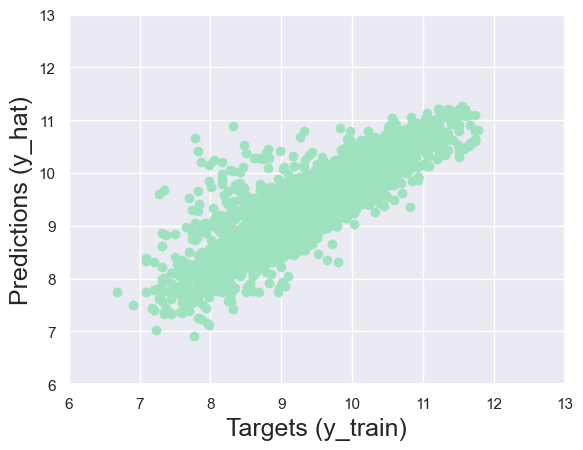

In [107]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

- The closer the points to the 45-degree line (line from (6,6) to (13,13)), the better the prediction
- For example, if the point for prediction y-axis is 7, we want this point to be as close at target x-axis 7 also
- In this case, y_hat at point 7.5, y_train is at 6.9 which means that predictions are abit higer than target.
- We want the x-axis and the y-axis to be the same to get the most perfect prediction
- Sometimes, the plot will have different scales of the x-axis and the y-axis, which is harder to interpret the '45-degree line'. Thus, use "Residual plot" in addition.

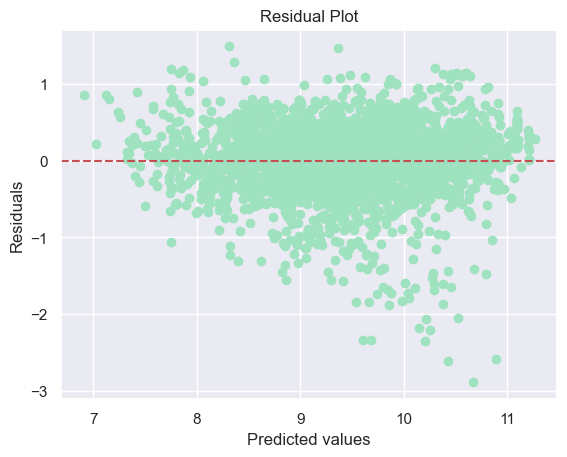

In [108]:
# Residual plot
plt.scatter(y_hat, y_train - y_hat)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

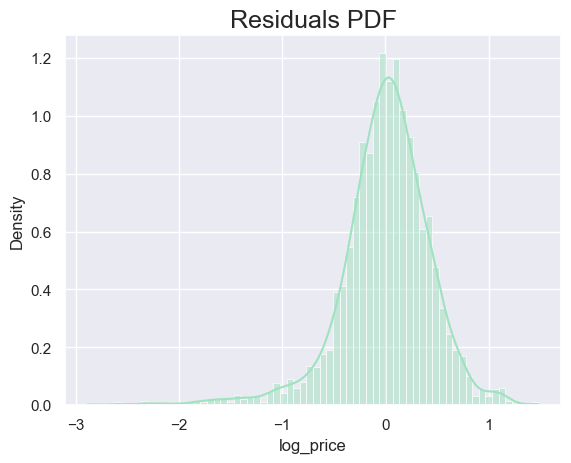

In [109]:
# Plot the PDF of the residuals and check for anomalies
# The error must be normally distributed with a  mean of zero.
# The residuals are the estimates of the errors 
sns.histplot(y_train - y_hat, kde=True, stat="density", color="#9FE2BF") #(actual - predicted values)
plt.title("Residuals PDF", size=18)

- From the graph, mean is zero and it is negatively skewed (left tail is longer - many negative residuals)
- Since (y_train - y_hat) is much lower than the mean, this imply that y_hat (predictions) are much higher than y_train (targets)
- This also means the predictions overestimates the target, and rarely understimates it (since it's less positive skewed)

In [110]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# note that this is NOT the adjusted R-squared

0.744996578792662

- Our model is explaining 75% of variability of data, which is considered safe

### Finding the weights and bias

In [111]:
# Obtain the bias (intercept) of the regression (to get baseline/starting point prediction)
reg.intercept_

9.415239458021299

In [112]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [113]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


- Positive weights shows feature increase, log price / price increase
- negative weights shows feature increase, log price / price decrease
- Notices that there's only 6 brands in features, 1 brand is missing

In [114]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

- Since Audi is dropped while all other dummies are zero, this makes Audi the benchmark
- Back to the graph above, a positive weight such as brand BMW and Mercedes_Benz imply that they are more expensive than the benchmark Audi.
- While a negative weight such as other brands above graph imply that they are less expensive than Audi

## Test

In [115]:
# After training and fine-tuning the model, proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# input: 'x_test', while outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# if predictions far off, model overfitted
y_hat_test = reg.predict(x_test)

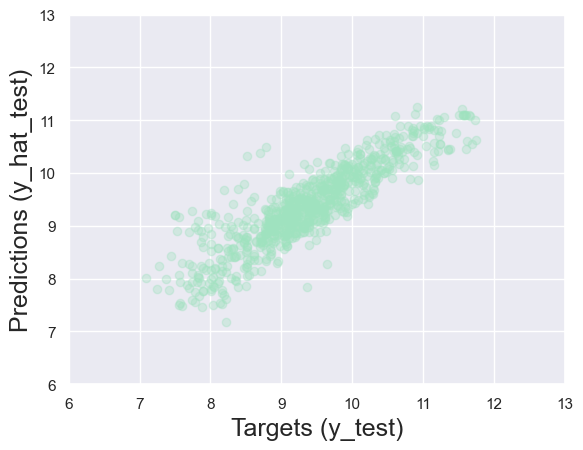

In [116]:
# Scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.34) #alpha = 1 full opacity, alpha = 0 fully transparent
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# The more staurated the color, the higher the concentraion

In [117]:
# Check these predictions
# To obtain the actual prices (not log prices), we take the exponential of the log_price with np.exp()
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [118]:
# Include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,NaN
1,3499.26,7900.00
2,7553.29,NaN
3,7463.96,NaN
4,11353.49,NaN
...,...,...
769,29651.73,6950.00
770,10732.07,NaN
771,13922.45,NaN
772,27487.75,NaN


- Note that lot of missing values (Target) suggests that something is wrong with the data frame / indexing

In [119]:
# Check what's wrong with data frame
y_test

1192    7.74
3360    7.94
2350    7.82
3257    8.76
892     9.12
        ... 
1935   10.29
3757    9.17
3134    9.81
1369   11.13
2595    9.29
Name: log_price, Length: 774, dtype: float64

- Upon inspecting this data frame, we can see that old indexes are still preserved
- Solution: forget this original indexing 

In [120]:
# Reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [121]:
# Overwrite the 'Target' column with the appropriate values again
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
...,...,...
769,29651.73,29500.00
770,10732.07,9600.00
771,13922.45,18300.00
772,27487.75,68500.00


In [122]:
# Calculate the difference between the targets and the predictions (to see how far target and prediction is)
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [123]:
# See how far off the predicted is from the target in form of result percentage-wise / residual difference %
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08
...,...,...,...,...
769,29651.73,29500.00,-151.73,0.51
770,10732.07,9600.00,-1132.07,11.79
771,13922.45,18300.00,4377.55,23.92
772,27487.75,68500.00,41012.25,59.87


In [124]:
# descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15946.76,18165.82,2219.06,36.26
std,13133.20,19967.86,10871.22,55.07
min,1320.56,1200.00,-29456.50,0.06
25%,7413.64,6900.00,-2044.19,12.11
50%,11568.17,11600.00,142.52,23.47
75%,20162.41,20500.00,3147.34,39.56
max,77403.06,126000.00,85106.16,512.69


- minimum different, 25%, 50%, 75% are very accurate
- However, the max differece is not accurate.

In [129]:
# Sometimes it is useful to check these outputs manually
pd.options.display.max_rows = 20 # To see 20 rows
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%,Abs Difference%
698,30480.85,30500.00,19.15,0.06,0.06
742,16960.31,16999.00,38.69,0.23,0.23
60,12469.21,12500.00,30.79,0.25,0.25
110,25614.14,25500.00,-114.14,0.45,0.45
367,42703.68,42500.00,-203.68,0.48,0.48
...,...,...,...,...,...
657,32481.05,6000.00,-26481.05,441.35,441.35
162,9954.42,1800.00,-8154.42,453.02,453.02
451,35956.50,6500.00,-29456.50,453.18,453.18
532,10019.90,1800.00,-8219.90,456.66,456.66


In [126]:
#Mean Absolute Percentage Error (MAPE)
# Calculate the absolute difference percentage
df_pf['Abs Difference%'] = df_pf['Difference%'].abs()

# Calculate Mean Absolute Percentage Error (MAPE)
mean_error_percentage = df_pf['Abs Difference%'].mean()

# Calculate accuracy percentage
accuracy_percentage = 100 - mean_error_percentage

print("MAPE: {:.2f}%".format(mean_error_percentage )) # Model's predictions are off by (MAPE)% from the actual prices
print("Average Accuracy: {:.2f}%".format(accuracy_percentage))

MAPE: 36.26%
Average Accuracy: 63.74%


## In conclusion
- Our model is using mileage, engine volume, brand, registration and body type to predict the price of a used car with an accuracy R-squared score of 74.5% and MAPE of 36.26%
- On average, our model is fairly accurate at predicting prices. However, the predictions tend to overestimate the target price.
- Tips to improve our model:
  1. Use different set of variables
  2. Remove a bigger part of the outliers
  3. Use different kinds of transformations